# Project 6: House Price Prediction
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal : $ Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# Resources
1. https://www.kaggle.com/c/house-prices-advanced-regression-techniques
2. https://www.kaggle.com/janiobachmann/predicting-grades-for-the-school-year

## Project by
1. Bedram Tamang
2. Abhisek Dhungel
3. Rojina shakya
4. Toshika Ojha
5. Krishna Mohan Pandey
6. Saruna Maharjan

# Import necessary Library

In [13]:
import pandas as pd
import numpy as np

# Load Csv File

In [16]:
train_data = pd.read_csv("csv/train.csv") 
test_data = pd.read_csv("csv/test.csv")

# Let's see what's on data

In [25]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


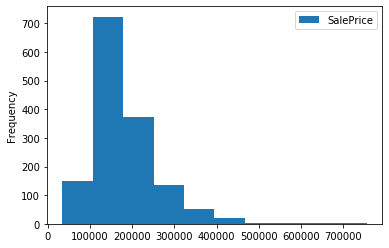

In [27]:
#Let's see how the price is distributed along with overall Quality
train_data.plot(x='MSSubClass',y='SalePrice',kind='hist')

# Sorry that's was not the graph I wished to display for.

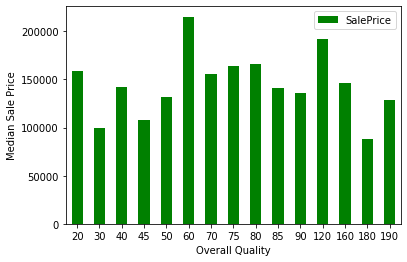

In [30]:
temp=train_data.pivot_table(index='MSSubClass',values='SalePrice',aggfunc=len)
quality_pivot=train_data.pivot_table(index='MSSubClass',values='SalePrice',aggfunc=np.median)

import matplotlib.pyplot as plt
#visualize this pivot table more easily, we can create a bar plot
#Notice that the median sales price strictly increases as Overall Quality increases.
quality_pivot.plot(kind='bar', color='g')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# Let's Introduce New Class

R^2 is: 
 -0.0014879539185581603
RMSE is: 
 0.1706849773595183


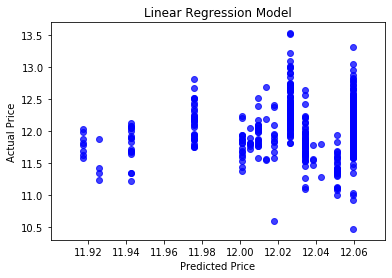

In [31]:
from LinearRegression import LinearRegression

lr = LinearRegression(train_data[['SalePrice','MSSubClass']])
# Dealing with null value
lr.dealingNullValue()
# Lebel the data and target
x,y = lr. labelData()
# split data into training and test datasets
x_train, x_test, y_train, y_test=lr.splitData(x,y)
# Fit the model
model = lr.fitModel(x_train,y_train)
# Calculate R2 score
print("R^2 is: \n", model.score(x_test, y_test))
# predict the model
prediction = lr.predict(model,x_test,y_test)
# Mean Square Error
lr.meanSquareError(y_test, prediction)
# show Graph
lr.showGraph(y_test,prediction)

# What about whole datasets ?

R^2 is: 
 0.862692392840781
RMSE is: 
 0.02340152542780038


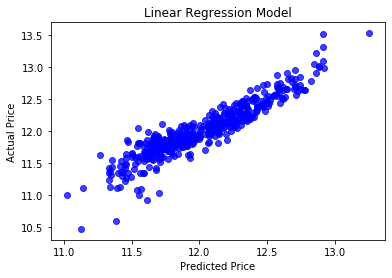

In [32]:
# Let's Put all the data into our sets
lr = LinearRegression(train_data)
lr.run()

# Can we Improve the results ?

In [3]:
# let's remove the unrelated features
# Correlating with salePrice
Correlation = train_data.corr()
Correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [58]:
#Selecting highly correlated features
cor_target = Correlation['SalePrice']
relevant_features = cor_target[cor_target>0.5]
Index=relevant_features.keys()
print(Index)
print("Total index:",len(Index))

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')
Total index: 11


In [59]:
relevant_data=pd.DataFrame(train_data,columns=Index)
print(relevant_data.head())

   OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            7       2003          2003          856       856       1710   
1            6       1976          1976         1262      1262       1262   
2            7       2001          2002          920       920       1786   
3            7       1915          1970          756       961       1717   
4            8       2000          2000         1145      1145       2198   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0         2             8           2         548     208500  
1         2             6           2         460     181500  
2         2             6           2         608     223500  
3         1             7           3         642     140000  
4         2             9           3         836     250000  


R^2 is: 
 0.8435985661336054
RMSE is: 
 0.026655712726278747


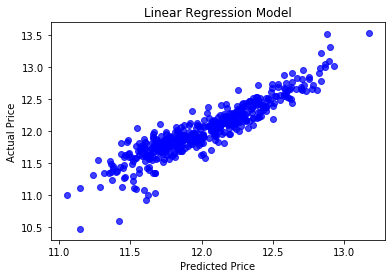

In [6]:
# Let's Put all the data into our sets
lr = LinearRegression(relevant_data)
lr.run()

In [7]:
# What about non numeric data ??

print ("Original: \n")
print (train_data.Street.value_counts(), "\n")

# our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.
# create a new column called enc_street. The pd.get_dummies() method will handle this for us
# Get Dummy Convert categorical variable into dummy/indicator variables
train_data['enc_street'] = pd.get_dummies(train_data.Street, drop_first=True)
test_data['enc_street'] = pd.get_dummies(test_data.Street, drop_first=True)

print ('Encoded: \n')
print (train_data.enc_street.value_counts())  # Pave and Grvl values converted into 1 and 0

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


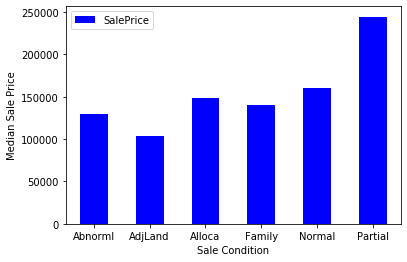

In [33]:
# look at SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual
condition_pivot = train_data.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# encode this SaleCondition as a new feature by using a similar method that we used for Street above
def encode(x): return 1 if x == 'Partial' else 0
train_data['enc_condition'] = train_data.SaleCondition.apply(encode)
test_data['enc_condition'] = test_data.SaleCondition.apply(encode)

In [ ]:
# explore this newly modified feature as a plot.
condition_pivot = train_data.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='g')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

R^2 is: 
 0.8625378682229949
RMSE is: 
 0.023427861272165867


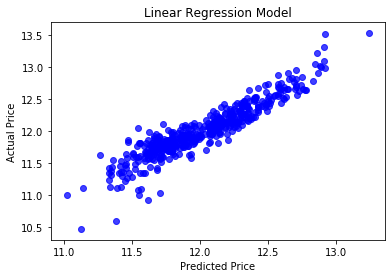

In [35]:
# Let's Put all the data into our sets
lr = LinearRegression(train_data)
lr.filterCorrelated('SalePrice',0.02)
lr.run()

# Improve the model

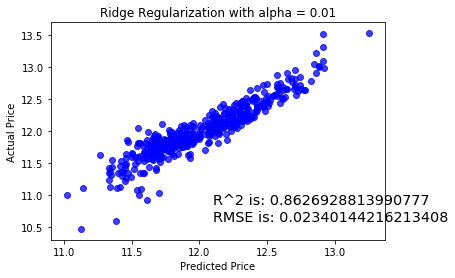

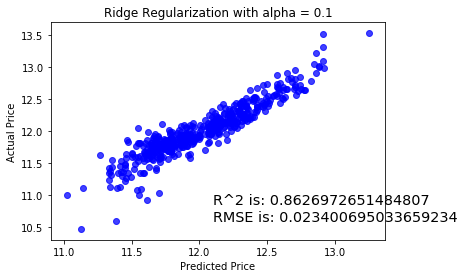

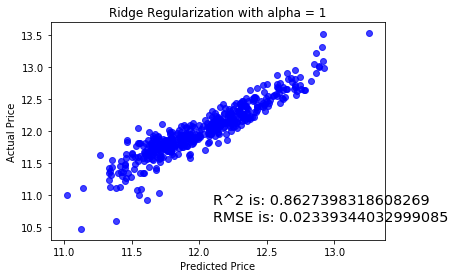

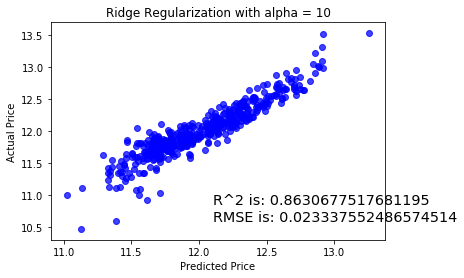

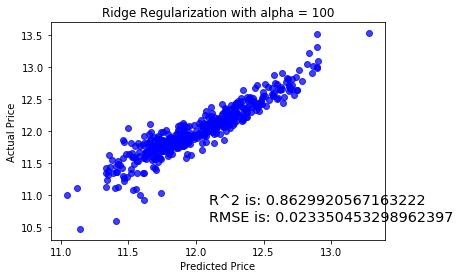

R^2 is: 
 0.862692392840781


In [44]:
#====== improve the model ================================================================#
#  try using Ridge Regularization to decrease the influence of less important features    #
#=========================================================================================#

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = LinearRegression(train_data)
# Dealing with null value
lr.dealingNullValue()
# Lebel the data and target
x,y = lr. labelData()
x_train, x_test, y_train, y_test=lr.splitData(x,y)
# Fit the model
model = lr.fitModel(x_train,y_train)

# experiment by looping through a few different values of alpha, and see how this changes our results.

for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)

    plt.scatter(preds_ridge, y_test, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(x_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

# if you examined the plots you can see these models perform almost identically to the first model.
# In our case, adjusting the alpha did not substantially improve our model.

print("R^2 is: \n", model.score(x_test, y_test))

# Predicting the Price 

In [57]:
# select the features from the test data for the model as we did above.
feats = test_data.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

# generate predictions
predictions = lr.predict(model,x_test,feats)

# transform the predictions to the correct form
# apply np.exp() to our predictions becasuse we have taken the logarithm(np.log()) previously.
final_predictions = np.exp(predictions)
Price=pd.DataFrame()
Price['Predicted Price']=final_predictions
print(Price)

     Predicted Price
0      151619.954199
1      302021.079831
2      117794.681826
3      173349.774395
4      310343.305680
5       83107.169744
6      236456.530558
7      151321.284433
8       83196.851955
9      144268.428708
10     146955.372220
11     121387.335504
12      91813.904364
13     194847.450828
14     178787.550173
15     133319.030059
16     207729.879089
17     127290.021940
18     113015.613007
19     217786.577205
20     169068.675496
21     207881.273189
22     185260.792421
23     135253.620950
24     205123.425941
25     144336.842223
26     191005.389444
27      95555.789303
28     177314.091066
29     174452.748087
..               ...
452    237069.457723
453    141953.931140
454    104667.550326
455    204668.113305
456    329670.450104
457    345858.252301
458    248908.657062
459    145447.192537
460    118218.550775
461    100309.979883
462    162641.803322
463    201408.419696
464    170133.532936
465    406954.746624
466    230903.768644
467    191486

# Conclusion
1. We can predict the price of house with 11 attributes with more than R-squared value 84%.
2. Both negative and positive correlation has effect on Sale Price.

# Limitation
1. Null data has been removed.
2. A high R-squared does not necessarily indicate that the model has a good fit.
3. We are limited to linear regression method only.